In [1]:
# mnist_softmax
# MNIST(Modified National Institute of Standard Technology) Dataset
# label : 0 ~ 9 , 손글씨체 이미지  28*28(784 byte) , gray scale
# batch : 큰 데이터를 쪼개어 1회에 작은 단위로 가져다가 학습, next_batch()
# epoch : batch를 반복하여 전체 데이터가 모두 소진되었을 때를 1 epoch
# Vanishing Gradient  : 신경망이 깊어 질수록 입력신호가 사라진다(줄어든다), sigmoid 사용시
# Relu  : Rectified Linear Unit, DNN(deep neural net) 구현시 sigmoid 대신 사용됨
# dropout : 전체 신경망의 일부를 사용하지 않고 학습, 예측시는 전체를 사용

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(5)

In [2]:
# mnist 데이터 가져오기
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (10000, 28, 28)
<class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (10000,)
5


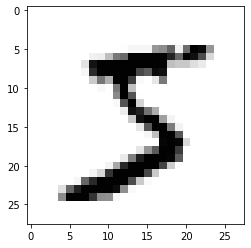

In [3]:
# 이미지로 출력
def show_one_image(n):
    print(type(x_train),x_train.shape)  # (60000, 28, 28)
    print(type(x_test),x_test.shape)    # (10000, 28, 28)
    print(type(y_train),y_train.shape)  # (60000,)
    print(type(y_test),y_test.shape)    # (10000,)
    
    image = x_train[n]
    print(y_train[n])  # 5
    
    plt.imshow(image,cmap='Greys')
    plt.show()
    
show_one_image(0)    # 0 ~ 59999 , 6만 개의 손글씨체 이미지(train)    

In [4]:
# one-hot 인코딩
nb_classes = 10     # 분류 class의 갯수(0 ~ 9)
Y_one_hot = tf.one_hot(y_train,nb_classes) # (60000, 10)
print(Y_one_hot.shape)                     # (60000, 10) , 2차원

# X값의 shape을 2차원으로 변환
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

# X값의 타입을 float형으로 변환
x_train = tf.cast(x_train,dtype=tf.float32)
print(x_train.shape,x_train.dtype)  # 'float32'

x_test = tf.cast(x_test,dtype=tf.float32)
print(x_test.shape,x_test.dtype)  # 'float32'

(60000, 10)
(60000, 784) <dtype: 'float32'>
(10000, 784) <dtype: 'float32'>


In [5]:
# 변수 초기화 : weight, bias
# (60000,784) * (784,10)  = (60000,10)

W = tf.Variable(tf.random.normal([784,nb_classes]), name ='weight')
b = tf.Variable(tf.random.normal([nb_classes]), name = 'bias')

In [6]:
# hypothesis 예측 함수 : H(X) = softmax(W*X + b)
def logits(X):
    return tf.matmul(X,W) + b

def hypothesis(X):
    return   tf.nn.softmax(logits(X))  

In [7]:
# 비용 함수 구현 방법  : tf.nn.softmax_cross_entropy_with_logits() 함수 사용
def cost_func():
    cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits(x_train),
                                                     labels=Y_one_hot) # Y값 주의!!
    cost = tf.reduce_mean(cost_i)
    return cost

In [8]:
# 경사 하강법
# learning_rate(학습율) 을 0.01로 설정하여 optimizer 객체를 생성
optimizer = tf.keras.optimizers.Adam(lr=0.01)

In [9]:
# # 방법 1. 전체 데이터를 한번에 학습, 비효율적이며 학습에 장시간 소요
# # 학습 시작
# print('***** Start Learning!!')
# for step in range(2001):
#     # cost를 minimize한다
#     optimizer.minimize(cost_func,var_list=[W,b])
    
#     if step % 100 == 0:
#         print('%04d'%step,'cost: [',cost_func().numpy(),']')

# print('***** Learning Finished')

In [10]:
# 회귀 계수 : weight과 bias출력
print('Weight :',W.numpy())
print('Bias:',b.numpy())

Weight : [[-0.18030666 -0.95028627 -0.03964049 ... -0.08899953  2.4488697
   0.762508  ]
 [ 1.2659615   0.9801489   1.5293121  ...  1.260746   -0.6830498
   0.02615766]
 [ 0.22328745  0.95914024 -0.37048063 ... -1.3800851  -0.47065532
   1.1383884 ]
 ...
 [ 1.0963665  -0.24865687  0.6223928  ...  1.5508499   0.4234103
   0.02520746]
 [-0.3527738   0.49265584  1.340357   ...  0.8335461  -0.7139727
  -0.36949137]
 [ 1.047035   -1.6678632  -0.931739   ...  0.5334487   0.9340817
   1.7896466 ]]
Bias: [ 0.22652863  0.8106553   0.7466094   0.7749703   0.72448725  1.4217405
 -0.08917825  1.3464464  -1.0210733   0.00945171]


In [11]:
# 정확도 측정, Accuracy Computation
# y_test 값의 one-hot 인코딩
Y_one_hot = tf.one_hot(y_test,nb_classes)  # (10000,10)
print(Y_one_hot.shape)                     # 2차원

def predict(X):
    return tf.argmax(hypothesis(X),1) 

correct_predict = tf.equal(predict(x_test),tf.argmax(Y_one_hot,1))

accuracy = tf.reduce_mean(tf.cast(correct_predict, dtype = tf.float32))

print("Accuracy:",accuracy.numpy()) # Accuracy: 0.8877

print('***** Predict')
pred = predict(x_test).numpy()
print(pred,y_test)

(10000, 10)
Accuracy: 0.1722
***** Predict
[5 2 2 ... 5 0 0] [7 2 1 ... 4 5 6]


In [12]:
# 방법 2. batch 사이즈로 나누어 학습, 효율적 이며 학습 시간 단축
# 학습 시작

training_epochs = 25
batch_size = 600

# 경사 하강법
# learning_rate(학습율) 을 0.01로 설정하여 optimizer 객체를 생성
optimizer = tf.keras.optimizers.Adam(lr=0.01)

Y_one_hot = tf.one_hot(y_train,nb_classes)  # (60000,10)

print('***** Start Learning!!')
for epoch in range(training_epochs):  # 25
    
    avg_cost = 0
    
    # 100 = 60000/600
    total_batch = int(x_train.shape[0]/batch_size)
    for k in range(total_batch):  # 100 
        batch_xs = x_train[0+k*batch_size:batch_size + k*batch_size]
        batch_ys = Y_one_hot[0+k*batch_size:batch_size + k*batch_size]
        
        # 비용함수
        def cost_func_batch():
            cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits(batch_xs),
                                                     labels=batch_ys) 
            cost = tf.reduce_mean(cost_i)
            return cost    
        
        # cost를 minimize한다
        optimizer.minimize(cost_func_batch,var_list=[W,b])
        avg_cost += cost_func_batch().numpy()/total_batch
    
    print('Epoch:','%04d'%(epoch + 1),'cost:','{:.9f}'.format(avg_cost))
          
print('***** Learning Finished')

***** Start Learning!!
Epoch: 0001 cost: 679.831721802
Epoch: 0002 cost: 204.055833588
Epoch: 0003 cost: 148.442460022
Epoch: 0004 cost: 121.082789116
Epoch: 0005 cost: 103.981336861
Epoch: 0006 cost: 91.995034866
Epoch: 0007 cost: 82.962849426
Epoch: 0008 cost: 75.600071487
Epoch: 0009 cost: 69.110813885
Epoch: 0010 cost: 63.939318447
Epoch: 0011 cost: 59.385780792
Epoch: 0012 cost: 55.339124718
Epoch: 0013 cost: 51.886596985
Epoch: 0014 cost: 48.720244255
Epoch: 0015 cost: 46.162903271
Epoch: 0016 cost: 43.617414646
Epoch: 0017 cost: 41.158525677
Epoch: 0018 cost: 39.149295692
Epoch: 0019 cost: 37.364985123
Epoch: 0020 cost: 35.704376373
Epoch: 0021 cost: 34.020390587
Epoch: 0022 cost: 32.822016287
Epoch: 0023 cost: 31.132872305
Epoch: 0024 cost: 30.278787022
Epoch: 0025 cost: 28.750059214
***** Learning Finished


In [13]:
# 회귀 계수 출력
print('Weight =', W.numpy())
print('Bias =', b.numpy())

Weight = [[-0.18030666 -0.95028627 -0.03964049 ... -0.08899953  2.4488697
   0.762508  ]
 [ 1.2659615   0.9801489   1.5293121  ...  1.260746   -0.6830498
   0.02615766]
 [ 0.22328745  0.95914024 -0.37048063 ... -1.3800851  -0.47065532
   1.1383884 ]
 ...
 [ 1.0963665  -0.24865687  0.6223928  ...  1.5508499   0.4234103
   0.02520746]
 [-0.3527738   0.49265584  1.340357   ...  0.8335461  -0.7139727
  -0.36949137]
 [ 1.047035   -1.6678632  -0.931739   ...  0.5334487   0.9340817
   1.7896466 ]]
Bias = [-1.4179924   2.569362    1.6995136  -0.35616645  1.3780442   7.1171045
 -1.6065992   3.4458313  -4.8376307  -1.1791999 ]


In [14]:
# 예측  , accuracy computation

def predict(X):
    return tf.argmax(hypothesis(X),1) 

Y_one_hot = tf.one_hot(y_test,nb_classes)  # (10000, 10)
# print(Y_one_hot.shape)

# print(x_test.dtype,x_test.shape)

correct_predict = tf.equal(predict(x_test),tf.argmax(Y_one_hot,1))
accuracy = tf.reduce_mean(tf.cast(correct_predict, dtype = tf.float32))

print('***** Predict')

pred = predict(x_test).numpy()
print(pred,y_test)
print("Accuracy:",accuracy.numpy()) # Accuracy:  0.8871

***** Predict
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
Accuracy: 0.8871


random = 579  Label: 7
Prediction : [7]


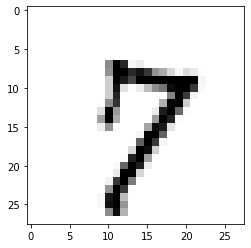

In [15]:
# 임의의 test 데이터로 예측한 값 시각화하기
r = np.random.randint(0,x_test.shape[0] - 1) # 0 to 9999 random int number
Y_one_hot = tf.one_hot(y_test,nb_classes)
print("random =",r," Label:", y_test[r])
print("Prediction :", predict(x_test[r:r+1]).numpy())

image = tf.reshape(x_test[r],(28,28))
plt.imshow(image,cmap='Greys')  
plt.show()